In [8]:
#import AI.GameLogic.GetGameState as GetGameState
import numpy as np
from random import choice
from matplotlib import pyplot as plt
from math import floor
from ipywidgets import widgets
%matplotlib inline
from time import time

In [27]:
def GetGameState(board,players):
    """
    Returns game state from a given board:
      0: Game has not reached terminal position
      players[0]: Game has reached terminal position with player players[0] victory
      players[1]: Game has reached terminal position with player players[1] victory
    Input must be of type np.array() with shape (121) and must only contain values of the following:
      0:Empty
      players[0]:Player 1
      players[1]:Player 2
    """
    PLAYERSTARTS = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    PLAYERDESTS = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

    # This takes too much computation
    # [1 if x in GLOBAL_CHECKED else 0 for x in range(121)]
    GLOBAL_CHECKED = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    WeightPos = [[1, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 1, 10, 11], [-1, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -10, -1, 1, 10, 11], [-11, -1, 10, 11], [-11, -10, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-11, -10, -1, 1], [-1, -11]]
    def check_state_from_queue(queue, _player):
        #print('Player:',player)
        #print('GlobalCheckedBegin:',np.flipud(np.rot90(np.array(GLOBAL_CHECKED).reshape(11,11))))
        LocalChecked = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        new_queue = []
        for position in queue:
            # print('position',position)
            GLOBAL_CHECKED[position]=1
            # print(WeightPos[position])
            for neighbor_w in WeightPos[position]:
                # NP Optimize
                neighbor = position+neighbor_w
                if board[neighbor] == players[_player] and board[position]==players[_player] and GLOBAL_CHECKED[neighbor]==0 and LocalChecked[neighbor]==0 :
                    #print(player,position,neighbor)
                    if (PLAYERDESTS[_player][neighbor]==1 and PLAYERSTARTS[_player][position]==0) and PLAYERDESTS[_player][position]==0:
                        #print('Win,Player:',player,'Neighbor:',neighbor,'Position:',position)
                        return 1
                    new_queue.append(neighbor)
                    LocalChecked[neighbor]=1
        if not new_queue:
            return 0
        else:
            #print('Q',queue)
            #print('GlobalC',np.flipud(np.rot90(np.array(GLOBAL_CHECKED).reshape(11,11))))
            #print('NQ',new_queue)
            return check_state_from_queue(new_queue, _player)

    if check_state_from_queue((0,1,2,3,4,5,6,7,8,9,10), 0) == 1:
        return players[0]
    else:
        GLOBAL_CHECKED = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        if check_state_from_queue((0,11,22,33,44,55,66,77,88,99,110), 1) == 1:
            return players[1]
        else:
            return 0

In [28]:
%%time
GetGameState([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

TypeError: GetGameState() missing 1 required positional argument: 'players'

In [29]:
%%time
GetGameState([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

TypeError: GetGameState() missing 1 required positional argument: 'players'

In [5]:
%%timeit -n 10000
GetGameState([choice((0,1,2)) for _ in range(121)])

230 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [99]:
%%time
TestGetGameState([0 for _ in range(121)])

0

In [14]:
%cython

UsageError: Line magic function `%cython` not found.


## Magikkal Testing

In [34]:
def transform(board):
    output = np.full((22,32),-3)
    for pos,val in enumerate(board):
        this_x = int((floor(pos/11)+(1/2)*(pos%11))*2)
        this_y = int(((pos%11)*2))
        output[this_y][this_x]=val
        output[this_y][this_x+1]=val
        output[this_y+1][this_x]=val
        output[this_y+1][this_x+1]=val
    return output
def path_test(n):
    flag = 0
    while flag==0:
        starttime=time()
        a_board = np.array([choice((0,-1,1)) for _ in range(121)])
        q = GetGameState(a_board,[1,-1])
        if q !=0:
            print(time()-starttime)
            print(q)
            plt.imshow(transform(a_board))
            flag=1

Button(description='Next', style=ButtonStyle())

0.0010237693786621094
-1


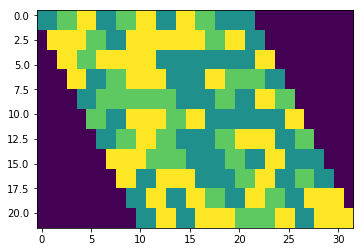

0.0009982585906982422
1


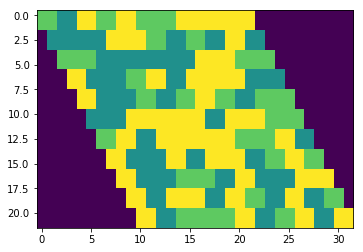

0.0
-1


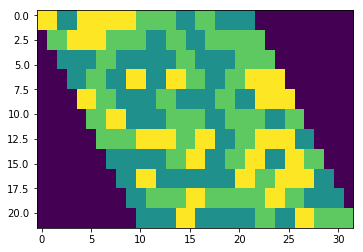

In [35]:
button = widgets.Button(description="Next")
display(button)
button.on_click(path_test)